In [2]:
import sklearn as sl
import warnings
warnings.filterwarnings("ignore")
sl.__version__

'1.2.2'

In [3]:
from pandas import read_csv

# Carregando os dados
arquivo = 'dados/pima-data-banceled.csv'
dados = read_csv(arquivo)

In [4]:
# Distribuição das classes
dados.groupby('class').size()

class
0    268
1    268
dtype: int64

In [5]:
# Import dos módulos
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import csv

In [6]:
# Separando o array em componentes de input e output
array = dados.values
X = array[:,0:8]
Y = array[:,9]

In [7]:
from sklearn.preprocessing import Normalizer

# Gerando a nova escala (normalizando os dados)
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", normalizedX[0:5,:])

Dados Originais: 

 [[5.71e+02 2.00e+00 1.30e+02 ... 2.68e-01 2.10e+01 0.00e+00]
 [3.58e+02 1.20e+01 8.80e+01 ... 3.78e-01 4.80e+01 0.00e+00]
 [3.74e+02 2.00e+00 1.22e+02 ... 8.16e-01 2.80e+01 0.00e+00]
 ...
 [7.59e+02 6.00e+00 1.90e+02 ... 2.78e-01 6.60e+01 1.00e+00]
 [7.61e+02 9.00e+00 1.70e+02 ... 4.03e-01 4.30e+01 1.00e+00]
 [7.66e+02 1.00e+00 1.26e+02 ... 3.49e-01 4.70e+01 1.00e+00]]

Dados Normalizados: 

 [[9.61503172e-01 3.36778694e-03 2.18906151e-01 1.61653773e-01
  0.00000000e+00 0.00000000e+00 3.80559925e-02 4.51283450e-04]
 [9.32816141e-01 3.12675801e-02 2.29295588e-01 1.92816744e-01
  1.04225267e-01 1.40704111e-01 9.19787982e-02 9.84928774e-04]
 [8.68144169e-01 4.64248219e-03 2.83191413e-01 1.20704537e-01
  9.98133670e-02 3.66756093e-01 8.40289275e-02 1.89413273e-03]
 [8.86299721e-01 1.03863249e-02 3.84294020e-01 1.93878064e-01
  1.35022223e-01 0.00000000e+00 1.04209459e-01 1.92839432e-03]
 [8.64364360e-01 3.47134281e-03 3.85319052e-01 2.98535482e-01
  6.59555134e-02 0.000

In [8]:
X = normalizedX

In [9]:
normalizedX

array([[9.61503172e-01, 3.36778694e-03, 2.18906151e-01, ...,
        0.00000000e+00, 3.80559925e-02, 4.51283450e-04],
       [9.32816141e-01, 3.12675801e-02, 2.29295588e-01, ...,
        1.40704111e-01, 9.19787982e-02, 9.84928774e-04],
       [8.68144169e-01, 4.64248219e-03, 2.83191413e-01, ...,
        3.66756093e-01, 8.40289275e-02, 1.89413273e-03],
       ...,
       [9.62425381e-01, 7.60810578e-03, 2.40923350e-01, ...,
        0.00000000e+00, 4.50146259e-02, 3.52508901e-04],
       [9.69230037e-01, 1.14626417e-02, 2.16516566e-01, ...,
        0.00000000e+00, 5.60395817e-02, 5.13271623e-04],
       [9.83070484e-01, 1.28338183e-03, 1.61706111e-01, ...,
        0.00000000e+00, 3.86297932e-02, 4.47900260e-04]])

In [11]:
# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# field names 
fields = ['Tipo','Modelo', 'Descrição Modelo', 'Acurária', 'Desvio'] 
    
# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('RF', RandomForestClassifier(n_estimators=100)))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

with open('resultados/resultados.csv', 'a') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)
    #write.writerow(fields)

    # Construção dos Modelos
    for nome, modelo in modelos:
        kfold = KFold(n_splits = num_folds, shuffle=True, random_state = seed)
        cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
        resultados.append(cv_results)
        nomes.append(nome)
        msg = "%s - %s: %f (%f)" % (nome, modelo, cv_results.mean(), cv_results.std())
        print(msg)

        # data rows of csv file 
        rows = [['Normalizer', nome, modelo, cv_results.mean(), cv_results.std() ] ]
        write.writerows(rows)
    
    # Close the file object
    f.close()


LR - LogisticRegression(): 0.608316 (0.049903)
LDA - LinearDiscriminantAnalysis(): 0.627079 (0.049778)
NB - GaussianNB(): 0.572781 (0.047186)
KNN - KNeighborsClassifier(): 0.651258 (0.031743)
CART - DecisionTreeClassifier(): 0.572676 (0.032765)
SVM - SVC(): 0.632739 (0.043508)


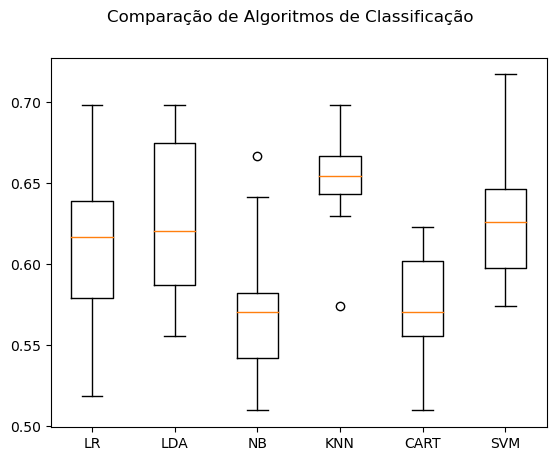

In [12]:
# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)

plt.savefig("graficos/Normalizacao_Normalizer.png")

plt.show()